In [1]:
import numpy as np
import pickle
import matplotlib
import matplotlib.pyplot as plt
import sys
import os
import random
from importlib import reload
from tqdm import tqdm
import copy

# Generate Data

In [2]:
# make data - using uniform dist and ranges
def generate_data(data_ranges, length, epsilon=0.0):
    # get max dims
    dims_x = [np.inf, -np.inf]
    dims_y = [np.inf, -np.inf]
    for clus in data_ranges:
        if(clus[0][0] < dims_x[0]):
            dims_x[0] = clus[0][0]
        if(clus[0][1] > dims_x[1]):
            dims_x[1] = clus[0][1]
        if(clus[1][0] < dims_y[0]):
            dims_y[0] = clus[1][0]
        if(clus[1][1] > dims_y[1]):
            dims_y[1] = clus[1][1]

    # generate
    data = np.zeros((1,2))
    labels = []
    for i,clus in enumerate(data_ranges):
        for j in range(length):
            if(np.random.rand() >= epsilon):
                data = np.append(data, [[
                    np.random.uniform(clus[0][0], clus[0][1]),
                    np.random.uniform(clus[1][0], clus[1][1]),
                ]], axis=0)
                labels.append(i)
            else:
                data = np.append(data, [[
                    np.random.uniform(dims_x[0], dims_x[1]),
                    np.random.uniform(dims_y[0], dims_y[1])
                ]], axis=0)
                labels.append(9)

    data = data[1:]

    return data, labels

In [7]:
data_ranges = [
    [ [-14.0, -2.0], [6.0, 16.0] ],
    [ [2.0, 15.0],   [-8.0, 6.0] ],
    [ [-12.0, -4.0], [-14.0, -6.0] ]
]
data, labels = generate_data(data_ranges, length=100)

# Test RBN

In [36]:
import rbn
reload(rbn)

rbnetwork = rbn.RBN(k=100, outputs=3)
rbnetwork.train(data, labels, alpha=.01, epochs=100, batch_size=100, error_target=.01)

  0%|          | 0/100 [00:00<?, ?it/s]


ValueError: operands could not be broadcast together with shapes (100,) (100,3) 

# Test kmeans

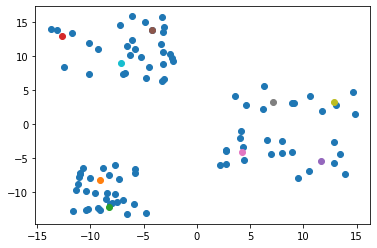

In [40]:
import kmeans
reload(kmeans)

km = kmeans.KMeans(k=10)
centers = km(data, eta=.1, error_target=.001)

fig, ax = plt.subplots()
ax.scatter(data[:,0], data[:,1])
for cen in centers:
    ax.scatter(*cen)